In [5]:
# get_ipython().magic('matplotlib notebook')
get_ipython().magic('matplotlib inline')
get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')
#___________________________________________________________________________________________________________________
import os
import tripyview as tpv
import shapefile as shp
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# Parameters
mesh_path ='/work/ollie/projects/clidyn/FESOM2/meshes/core2/'
save_path = None #'~/figures/test_papermill/'
save_fname= None

#_____________________________________________________________________________________
which_cycl= 1
which_mode= 'zmeantransects'

#_____________________________________________________________________________________
input_paths= list()
input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_jayne_bin_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_nycander_bin_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke+idemix_stormtide_bin_ck0.1/')
input_paths.append('/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1_v2/')

input_names= list()
input_names.append('TKE+idemix,ck0.1,jayne')
input_names.append('TKE+idemix,ck0.1,nycand')
input_names.append('TKE+idemix,ck0.1,stormt')
input_names.append('TKE ck0.1')

vname     = 'KvN2/N2'
year      = [1979,2019]
mon, day, record, box, depth = None, None, None, None, None

#_____________________________________________________________________________________
# do anomaly plots in case ref_path is not None
ref_path  = None #'/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1/' # None
ref_name  = None #'TKE, ck=0.1' # None
ref_year  = None # [2009,2019]
ref_mon, ref_day, ref_record = None, None, None

#_____________________________________________________________________________________
box_region = list()
box_region.append('global')
# box_region.append('ocean_basins/Arctic_Basin.shp')
#box_region.append('ocean_basins/Eurasian_Basin.shp')
#box_region.append('ocean_basins/Atlantic_Basin.shp')
#box_region.append('mpas_region/Canada_Basin.shp')
#box_region.append('mpas_region/North_Atlantic_Ocean.shp')
#box_region.append('mpas_region/Greenland_Sea.shp')
#box_region.append('mpas_region/Irminger_Sea.shp')
#box_region.append('mpas_region/Norwegian_Sea.shp')
#box_region.append('mpas_region/Labrador_Sea.shp')
#box_region.append('mpas_region/North_Pacific_Ocean.shp')
#box_region.append('mpas_region/South_Pacific_Ocean.shp')
#box_region.append('mpas_region/Southern_Ocean.shp')
#box_region.append('mpas_region/Western_Weddell_Sea.shp')

#_____________________________________________________________________________________
do_clim   = True
which_clim= 'phc3'
clim_path = '/work/ollie/pscholz/INIT_HYDRO/phc3.0/phc3.0_annual.nc'

#_____________________________________________________________________________________
cstr      = 'blue2red'
cnum      = 20
cref      = None
crange, cmin, cmax, cfac, climit = None, None, None, None, None
chist, ctresh = True, 0.995

#_____________________________________________________________________________________
ncolumn   = 3 
do_rescale= None
which_dpi = 300
do_contour= True
do_ylog   = False

In [7]:
#___LOAD FESOM2 MESH___________________________________________________________________________________
mesh=tpv.load_mesh_fesom2(mesh_path, do_rot='None', focus=0, do_info=True, do_pickle=True,
                      do_earea=True, do_narea=True, do_eresol=[True,'mean'], do_nresol=[True,'eresol'])

#______________________________________________________________________________________________________
if which_cycl is not None: 
    for ii,ipath in enumerate(input_paths):
        # print(ii, ipath, ipath[0])
        input_paths[ii] = os.path.join(ipath,'{:d}/'.format(which_cycl))
        print(ii, input_paths[ii])
    
    if ref_path is not None:
        ref_path = os.path.join(ref_path,'{:d}/'.format(which_cycl))
        print('R', ref_path)
        
#______________________________________________________________________________________________________        
cinfo=dict({'cstr':cstr, 'cnum':cnum}) 
if crange   is not None: cinfo['crange']=crange
if cmin     is not None: cinfo['cmin'  ]=cmin
if cmax     is not None: cinfo['cmax'  ]=cmax
if cref     is not None: cinfo['cref'  ]=cref
if cfac     is not None: cinfo['cfac'  ]=cfac 
if climit   is not None: cinfo['climit']=climit  
if chist    is not None: cinfo['chist' ]=chist
if ctresh   is not None: cinfo['ctresh']=ctresh    
if ref_path is not None: cinfo['cref'  ]=0.0    
    
#______________________________________________________________________________________________________
# in case of diff plots
if ref_path is not None:
    if ref_year   is None: ref_year   = year
    if ref_mon    is None: ref_mon    = mon
    if ref_record is None: ref_record = record
        
#________________________________________________________________________________________________________
# define index regions --> reading shape files
box = list()
shp_path = os.path.join(tpv.__path__[0],'shapefiles/')
for region in box_region:
    if region is 'global' or isinstance(region,list): box.append(region)
    else: box.append(shp.Reader(os.path.join(shp_path,region)))       

 > found *.pckl file: /work/ollie/pscholz/meshcache_tripyview/core2
 > load  *.pckl file: tripyview_fesom2_core2.pckl
___FESOM2 MESH INFO________________________
 > path            = /work/ollie/projects/clidyn/FESOM2/meshes/core2
 > id              = core2
 > do rot          = None
 > [al,be,ga]      = 50, 15, -90
 > do augmpbnd     = True
 > do cavity       = False
 > do lsmask       = True
 > do earea,eresol = True, True
 > do narea,nresol = True, True
___________________________________________
 > #node           = 126858
 > #elem           = 244659
 > #lvls           = 48
___________________________________________
0 /home/ollie/pscholz/results/trr181_tke+idemix_jayne_bin_ck0.1/1/
1 /home/ollie/pscholz/results/trr181_tke+idemix_nycander_bin_ck0.1/1/
2 /home/ollie/pscholz/results/trr181_tke+idemix_stormtide_bin_ck0.1/1/
3 /home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1_v2/1/


In [8]:
#___LOAD FESOM2 REFERENCE DATA________________________________________________________________________
if ref_path is not None:
    print(ref_path)
    if vname=='Kv*N2':     
        data_ref  = tpv.load_data_fesom2(mesh, ref_path, vname='Kv', year=ref_year, mon=ref_mon, descript=ref_name , do_info=False)
        data2_ref = tpv.load_data_fesom2(mesh, ref_path, vname='N2', year=ref_year, mon=ref_mon, descript=ref_name , do_info=False)
        data_ref['Kv'].data = data_ref['Kv'].data * data2_ref['N2'].data
        data_ref  = data_ref.rename(dict({'Kv':'Kv*N2'}))
        data_ref['Kv*N2'].attrs['units'], data_ref['Kv*N2'].attrs['description'], data_ref['Kv*N2'].attrs['long_name'] = '$m^2/s^3$', '(Kv)*(N^2)', '$\\overline{{Kv}} \\cdot \\overline{{N^2}}$'
        del(data2_ref)
    elif vname=='KvN2':     
        data_ref  = tpv.load_data_fesom2(mesh, ref_path, vname='KvN2', year=ref_year, mon=ref_mon, descript=ref_name , do_info=False)
        data_ref['KvN2'].attrs['units'], data_ref['KvN2'].attrs['description'], data_ref['KvN2'].attrs['long_name'] = '$m^2/s^3$', '(Kv*N^2)', '$\\overline{{Kv \\cdot N^2}}$'
    elif vname=='KvN2/N2':     
        data_ref  = tpv.load_data_fesom2(mesh, ref_path, vname='KvN2', year=ref_year, mon=ref_mon, descript=ref_name , do_info=False)
        data2_ref = tpv.load_data_fesom2(mesh, ref_path, vname='N2', year=ref_year, mon=ref_mon, descript=ref_name , do_info=False)
        data_ref['KvN2'].data = data_ref['KvN2'].data / data2_ref['N2'].data
        data_ref  = data_ref.rename(dict({'KvN2':'KvN2/N2'}))
        data_ref['KvN2/N2'].attrs['units'], data_ref['KvN2/N2'].attrs['description'], data_ref['KvN2/N2'].attrs['long_name'] = '$m^2/s$', '(Kv*N^2)/N2', '$\\overline{{Kv \\cdot N^2}} / \\overline{{N^2}}$'
        del(data2_ref)
    else:
        data_ref = tpv.load_data_fesom2(mesh, ref_path, vname=vname, year=ref_year, mon=ref_mon, descript=ref_name, do_info=False) 
    #__________________________________________________________________________________________________    
    data_ref = tpv.load_zmeantransect_fesom2(mesh, data_ref, box, do_compute=True)

#___LOAD FESOM2 DATA___________________________________________________________________________________
list_zmtransects = list()
for datapath, descript in zip(input_paths, input_names):
    print(datapath, descript)
    if vname=='Kv*N2':
        data  = tpv.load_data_fesom2(mesh, datapath, vname='Kv' , year=year, mon=mon, descript=descript , do_info=False)
        data2 = tpv.load_data_fesom2(mesh, datapath, vname='N2' , year=year, mon=mon, descript=descript , do_info=False)
        data['Kv'].data = data['Kv'].data * data2['N2'].data
        data  = data.rename(dict({'Kv':'Kv*N2'}))
        data['Kv*N2'].attrs['units'], data['Kv*N2'].attrs['description'], data['Kv*N2'].attrs['long_name'] = '$m^2/s^3$', '(Kv)*(N^2)', '$\\overline{{Kv}} \\cdot \\overline{{N^2}}$'
        del(data2)
    elif vname=='KvN2':
        data  = tpv.load_data_fesom2(mesh, datapath, vname='KvN2' , year=year, mon=mon, descript=descript , do_info=False)
        data['KvN2'].attrs['units'], data['KvN2'].attrs['description'], data['KvN2'].attrs['long_name'] = '$m^2/s^3$', '(Kv*N^2)', '$\\overline{{Kv \\cdot N^2}}$'
    elif vname=='KvN2/N2':
        data  = tpv.load_data_fesom2(mesh, datapath, vname='KvN2' , year=year, mon=mon, descript=descript , do_info=False)
        data2 = tpv.load_data_fesom2(mesh, datapath, vname='N2' , year=year, mon=mon, descript=descript , do_info=False)
        data['KvN2'].data = data['KvN2'].data / data2['N2'].data
        data  = data.rename(dict({'KvN2':'KvN2/N2'}))
        data['KvN2/N2'].attrs['units'], data['KvN2/N2'].attrs['description'], data['KvN2/N2'].attrs['long_name'] = '$m^2/s$', '(Kv*N)/N2', '$\\overline{{Kv \\cdot N^2}} / \\overline{{N^2}}$'
        del(data2)    
    else:
        data  = tpv.load_data_fesom2(mesh, datapath, vname=vname, year=year, mon=mon, descript=descript , do_info=False)
    #__________________________________________________________________________________________________        
    data_zmtransect = tpv.load_zmeantransect_fesom2(mesh, data, box, do_compute=True)
 
    #__________________________________________________________________________________________________    
    if ref_path is not None:
        list_zmtransects.append(tpv.do_transectanomaly(data_zmtransect, data_ref))  
    else:
        list_zmtransects.append(data_zmtransect)  
    del(data, data_zmtransect)
    
if ref_path is not None: del(data_ref)

#___APPEND ABS CLIMATOLOGY_____________________________________________________________________________    
if (vname in ['temp', 'salt', 'pdens'] or 'sigma' in vname) and do_clim and (ref_path is None): 
    clim_vname= vname
    if   vname=='temp' and  which_clim.lower()=='woa18': clim_vname = 't00an1'
    elif vname=='salt' and  which_clim.lower()=='woa18': clim_vname = 's00an1'
    clim            = tpv.load_climatology(mesh, clim_path, clim_vname)
    clim_zmtransect = tpv.load_zmeantransect_fesom2(mesh, clim, box, do_compute=True, diagpath=input_paths[0])
    list_zmtransects.append(clim_zmtransect)  
    del(clim, clim_zmtransect)

/home/ollie/pscholz/results/trr181_tke+idemix_jayne_bin_ck0.1/1/ TKE+idemix,ck0.1,jayne
/home/ollie/pscholz/results/trr181_tke+idemix_nycander_bin_ck0.1/1/ TKE+idemix,ck0.1,nycand
/home/ollie/pscholz/results/trr181_tke+idemix_stormtide_bin_ck0.1/1/ TKE+idemix,ck0.1,stormt
/home/ollie/pscholz/results/trr181_tke_ctrl_ck0.1_v2/1/ TKE ck0.1


{'cstr': 'blue2red', 'cnum': 20, 'cmin': -1.89, 'cmax': 1.36, 'cref': -0.26, 'cmap': <matplotlib.colors.LinearSegmentedColormap object at 0x7fbbbc351ed0>, 'clevel': array([-1.96, -1.86, -1.76, -1.66, -1.56, -1.46, -1.36, -1.26, -1.16,
       -1.06, -0.96, -0.86, -0.76, -0.66, -0.56, -0.46, -0.36, -0.26,
       -0.16, -0.06,  0.04,  0.14,  0.24,  0.34,  0.44,  0.54,  0.64,
        0.74,  0.84,  0.94,  1.04,  1.14,  1.24,  1.34,  1.44])}


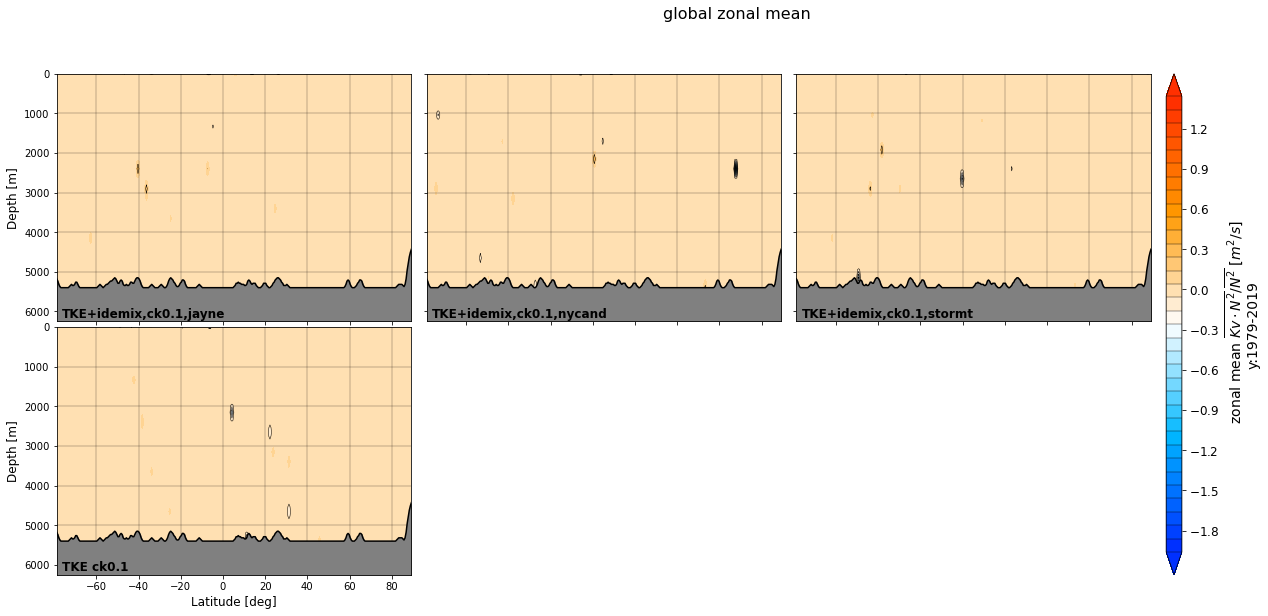

In [9]:
#___PLOT FESOM2 DATA___________________________________________________________________________________
spath  = save_path
sname  = vname
slabel = list_zmtransects[0][0][sname].attrs['str_lsave']
strans = list_zmtransects[0][0][vname].attrs['transect_name'].replace(' ','_').lower()
if spath is not None: spath  = '{}/{}_{}_{}_{}.png'.format(spath, which_mode, sname, strans, slabel) 
nrow   = np.ceil(len(list_zmtransects)/ncolumn).astype('int')
if save_fname is not None: spath = save_fname

fig, ax, cbar = tpv.plot_zmeantransects(list_zmtransects, cinfo=cinfo, figsize=[ncolumn*7, nrow*4], n_rc=[nrow, ncolumn], 
                do_rescale=do_rescale, pos_gap=[0.01, 0.01], pos_extend=[0.05, 0.08, 0.97,0.95], cbar_nl=12, do_ylog = do_ylog, 
                do_save = spath, save_dpi=which_dpi, do_contour=do_contour )